In [1]:
import pandas as pd
from selenium import webdriver

In [2]:

driver = webdriver.Chrome(executable_path = 'C:\\Users\\sakan_\\PremierLeague\\chromedriver.exe')
url = "https://siouxfalls.craigslist.org/search/cta?search_distance=60&postal=57042&min_price=1500&max_price=3000"
driver.get(url)




In [3]:
#all_links = driver.find_element_by_css_selector("a[class='result-image gallery']")
urls = []

#get url of post
all_posts = driver.find_elements_by_class_name("result-row")
for post in all_posts:
    #print( post.find_elements_by_class_name("'result-image gallery'") )
    #print(post.text)        
    url = post.find_element_by_css_selector("a[class='result-title hdrlnk']").get_attribute('href')
    urls.append(url)
driver.close()  

In [4]:
urls

['https://siouxfalls.craigslist.org/cto/d/madison-2008-kia-rondo/7237939741.html',
 'https://siouxfalls.craigslist.org/cto/d/ramona-1964-ford-f350-truck/7242296023.html',
 'https://siouxfalls.craigslist.org/cto/d/colton-1985-pontiac-fiero/7242452583.html',
 'https://sd.craigslist.org/cto/d/canova-2002-chevy-4x4-pickup/7240690701.html',
 'https://siouxfalls.craigslist.org/cto/d/brookings-honda-civic-hybrid/7239800876.html',
 'https://siouxfalls.craigslist.org/cto/d/brookings-2009-subaru-forester/7242705975.html',
 'https://siouxfalls.craigslist.org/cto/d/renner-2001-dodge-intrepid-es/7238971606.html',
 'https://siouxfalls.craigslist.org/cto/d/sioux-falls-1993-chevy-pickup/7231671910.html',
 'https://siouxfalls.craigslist.org/cto/d/sioux-falls-2004-pontiac-grand-prix/7242754958.html',
 'https://marshall.craigslist.org/cto/d/white-2006-audi-a4-quattro/7234931643.html',
 'https://siouxfalls.craigslist.org/ctd/d/sioux-falls-2000-ford-crown-victoria/7239351477.html',
 'https://siouxfalls.cra

In [5]:


#prepare list 
lst_make = []
lst_price = []
lst_year = []
lst_model = []
lst_desc = []
lst_condition = []
lst_cylinders = []
lst_drive = []
lst_odo = []
lst_status = []
lst_trans = []
lst_url = []

#url = 'https://siouxfalls.craigslist.org/cto/d/sioux-falls-2009-pontiac-vibe/7231827659.html'
#open each page

for url in urls:
    driver = webdriver.Chrome(executable_path = 'C:\\Users\\sakan_\\PremierLeague\\chromedriver.exe')
    driver.get(url)
    # Year, Make, Model, Description
    titletext = driver.find_element_by_css_selector("p[class='attrgroup']").text
    text = titletext.split(' ')
    lst_year.append(text[0])
    lst_make.append(text[1])
    #get model
    try:
        dummy_model = text[2]
        index = titletext.index(dummy_model)
        model = titletext[index:]
        lst_model.append(model)
    except Exception as e:
        lst_model.append("")
    #get price
    try:
        price =  driver.find_element_by_class_name("price").text
        price = price.replace("$","")
        price = price.replace(",","")
        price = int(price)
    except Exception as e:
        price = ""
    lst_price.append(price)
    description = driver.find_element_by_id('postingbody').text
    lst_desc.append(description)
    #Other attributes
    attrtext = driver.find_elements_by_class_name("attrgroup")
    attr_ = attrtext[1].text   
    attr_list = attr_.splitlines()
    #convert list to dictionary to for searchable
    attr_dict = {}
    for item in attr_list:
        if item.find(":") > -1:
            key, value = item.split(":")
            attr_dict[key] = value        
        #key = item.split(":")[0]
        #value = item.split(":")[1]

    if "condition" in attr_dict:
        lst_condition.append(attr_dict["condition"])
    else:
        lst_condition.append("")
    if "cylinders" in attr_dict:
        lst_cylinders.append(attr_dict["cylinders"])
    else:
        lst_cylinders.append("")
    if "drive" in attr_dict:
        lst_drive.append(attr_dict["drive"])
    else:
        lst_drive.append("")        
    if "odometer" in attr_dict:
        lst_odo.append(attr_dict["odometer"])
    else:
        lst_odo.append("")       
    if "title status" in attr_dict:
        lst_status.append(attr_dict["title status"])
    else:
        lst_status.append("")  
    if "transmission" in attr_dict:
        lst_trans.append(attr_dict["transmission"])
    else:
        lst_trans.append("")      
    
    lst_url.append(url)
   
    driver.close()


#put data in datafram 
all_data = {'make':lst_make,'price':lst_price,'year':lst_year,'model':lst_model,'description':lst_desc, 
            'condition':lst_condition,'cylinders':lst_cylinders,'drive':lst_drive,'odometer':lst_odo, 'status':lst_status,
           'transmission':lst_trans, 'url':lst_url}
df = pd.DataFrame(data=all_data)

In [6]:
#save df to file
df

,make,price,year,model,description,condition,cylinders,drive,odometer,status,transmission,url
0,kia,2300,2008,rondo lx,"2008 Kia Rondo LX\n112,500 miles\nRuns great\n...",,,,,clean,automatic,https://siouxfalls.craigslist.org/cto/d/madiso...
1,Ford,1500,1964,F350,"Purchased with using the perfect hood, but goi...",,,,21000,missing,manual,https://siouxfalls.craigslist.org/cto/d/ramona...
2,pontiac,1900,1985,fiero se,The perfect winter project! My kid is ready to...,good,4 cylinders,rwd,95000,clean,automatic,https://siouxfalls.craigslist.org/cto/d/colton...
3,chevy,1500,2002,silverado,For sale 2002 chevy 3/4 ton 4x4 pickup truck\n...,,,,319600,clean,automatic,https://sd.craigslist.org/cto/d/canova-2002-ch...
4,HONDA,2700,2007,CIVIC HYBRID,2007 HONDA CIVIC HYBRID\nCar in excellent cond...,excellent,4 cylinders,fwd,129000,salvage,automatic,https://siouxfalls.craigslist.org/cto/d/brooki...
5,subaru,2000,2009,forester awd,For sale 2009 Subaru Forester. Still runs grea...,fair,4 cylinders,4wd,224800,clean,manual,https://siouxfalls.craigslist.org/cto/d/brooki...
6,dodge,2000,2001,intrepid es,2001 Dodge Intrepid ES Motorsports Edition. Th...,good,6 cylinders,fwd,130000,clean,automatic,https://siouxfalls.craigslist.org/cto/d/renner...
7,Chevy,1500,1993,1500 stepside,Selling my dad's DO IT ALL truck...he's had th...,fair,8 cylinders,4wd,216000,clean,automatic,https://siouxfalls.craigslist.org/cto/d/sioux-...
8,2004,1500,2004,pontiac grand prix,The only thing wrong with the car is that the ...,fair,6 cylinders,fwd,233429,clean,automatic,https://siouxfalls.craigslist.org/cto/d/sioux-...
9,audi,2500,2006,a4,Here I have a 2006 Audi A4 and it is all wheel...,good,,4wd,221134,clean,automatic,https://marshall.craigslist.org/cto/d/white-20...


In [7]:
from re import sub
from decimal import Decimal
df.to_csv("car_craiglist5.csv")
#test$
#convert price to int


    
#type(df["price"])
df_car = pd.read_csv("car_craiglist5.csv")

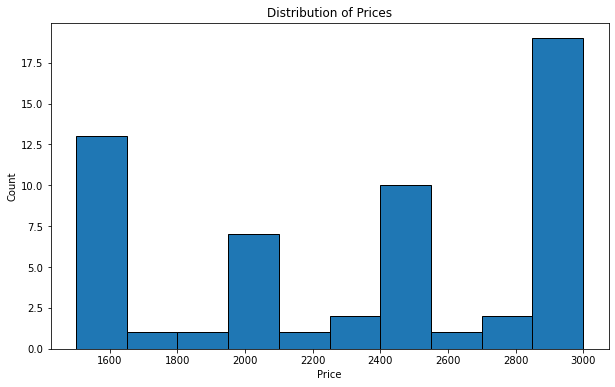

In [8]:
from matplotlib import figure
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.hist(df_car['price'], edgecolor='black');
plt.xlabel("Price")
plt.ylabel('Count')
plt.title("Distribution of Prices");

C:\Users\sakan_\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sakan_\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


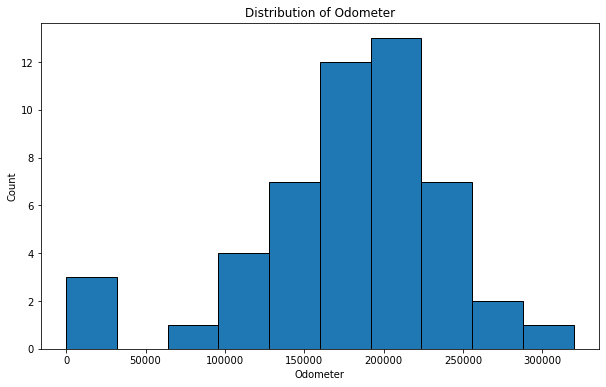

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df_car['odometer'], edgecolor='black');
plt.xlabel("Odometer")
plt.ylabel('Count')
plt.title("Distribution of Odometer");

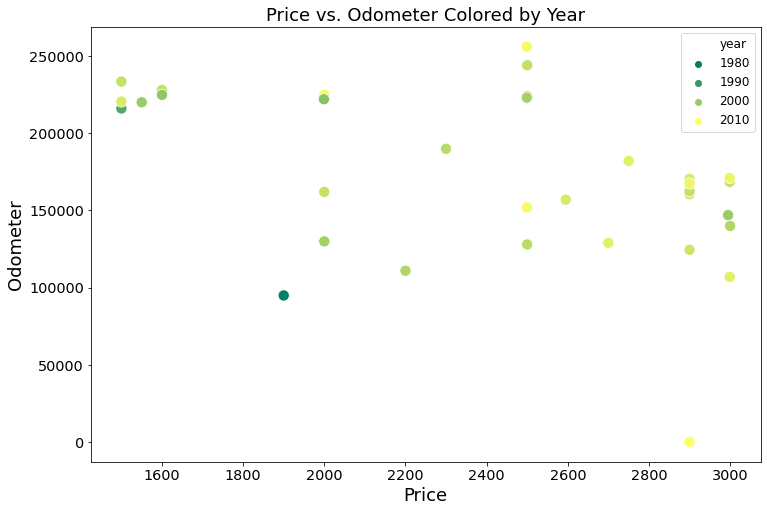

In [10]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='odometer', hue='year', palette='summer', x_jitter=True, y_jitter=True, s=125, data=df_car.dropna())
plt.legend(fontsize=12)
plt.xlabel("Price", fontsize=18)
plt.ylabel("Odometer", fontsize=18);
plt.title("Price vs. Odometer Colored by Year", fontsize=18);

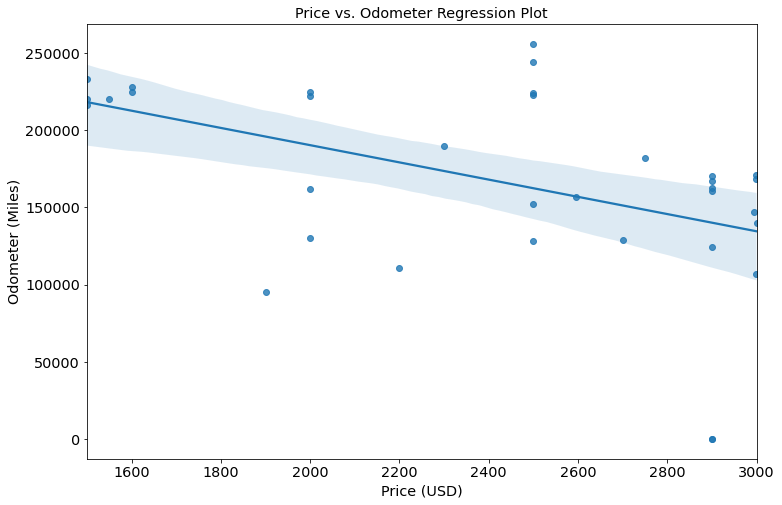

In [11]:

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='odometer', data=df_car.dropna());
plt.title('Price vs. Odometer Regression Plot');
plt.xlabel("Price (USD)");
plt.ylabel("Odometer (Miles)");

In [12]:
japanese_make = ['toyota','honda','mitsubishi','mazda','subaru','nissan']
japanese_make = ['ford']
df_jap = df_car[df_car['make'].isin(japanese_make)]

df_ford = df_jap[(df_jap['price'] <= 3500) & (df_jap['price'] >= 300) ]


In [13]:
df_ford.to_csv('ford.csv')

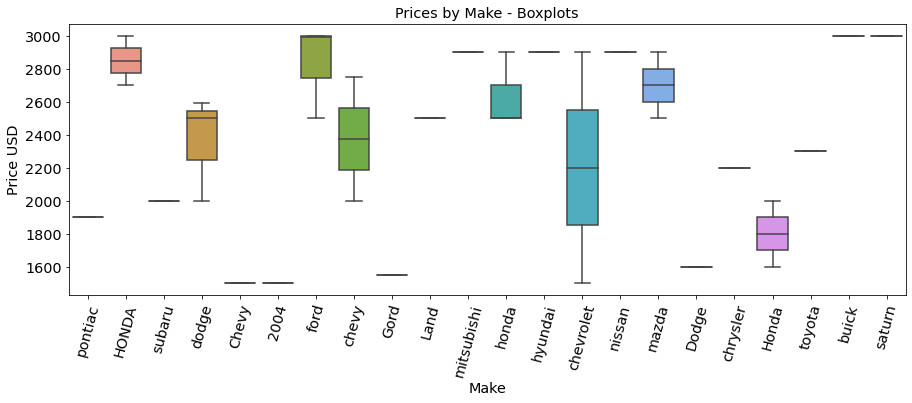

In [14]:
sns.boxplot(x='make', y='price', data=df_car.dropna())
plt.xlabel("Make");
plt.xticks(rotation=75)
plt.ylabel("Price USD");
plt.title("Prices by Make - Boxplots");

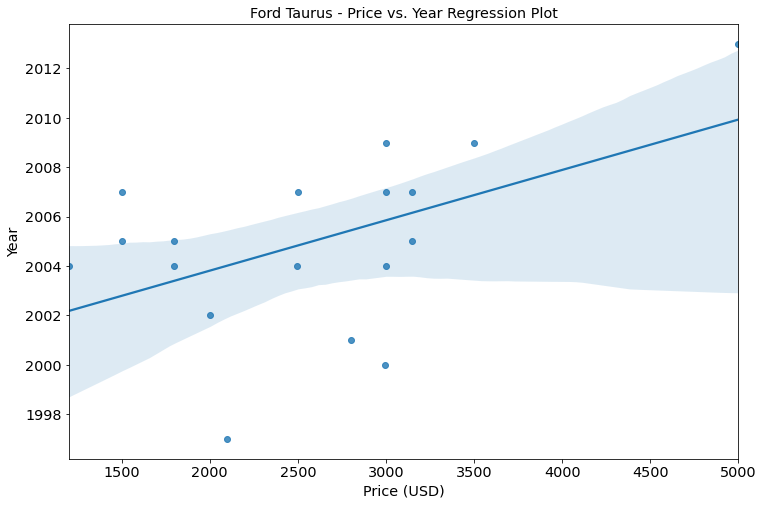

In [15]:
ford_t = pd.read_csv('ford-t.csv')
plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='year', data=ford_t.dropna());
plt.title('Ford Taurus - Price vs. Year Regression Plot');
plt.xlabel("Price (USD)");
plt.ylabel("Year");